# New York City Yellow Taxi Fare - Prediction

In [1]:
# Importing required Packages
import pandas as pd
import numpy as np
from sklearn import metrics  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read Test and Train
taxi_fare=pd.read_csv("taxi_fare.csv")
test_fare=pd.read_csv("test_fare.csv")

In [3]:
# Copy of original data
train=taxi_fare.copy()
test=test_fare.copy()

In [4]:
# Features in the dataset
train.columns, test.columns

(Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
        'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
        'month', 'day', 'dayOfWeek', 'hour', 'timeOfDayMid.Day',
        'timeOfDayMorning', 'timeOfDayNight'],
       dtype='object'),
 Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
        'dropoff_latitude', 'passenger_count', 'year', 'month', 'day',
        'dayOfWeek', 'hour', 'timeOfDayMid.Day', 'timeOfDayMorning',
        'timeOfDayNight'],
       dtype='object'))

In [5]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight
count,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06
mean,1.061528e+01,-7.397526e+01,4.075089e+01,-7.397436e+01,4.075124e+01,1.684182e+00,3.736753e+00,6.268586e+00,1.570568e+01,4.122257e+00,1.350867e+01,2.363074e-01,1.398658e-01,4.344701e-01
std,6.787814e+00,4.479551e-02,3.424334e-02,4.329849e-02,3.716876e-02,1.306624e+00,1.863201e+00,3.437946e+00,8.682210e+00,1.988030e+00,6.513901e+00,4.248133e-01,3.468478e-01,4.956874e-01
min,3.300000e+00,-7.953506e+01,3.579768e+01,-7.948642e+01,3.556155e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399229e+01,4.073653e+01,-7.399160e+01,4.073550e+01,1.000000e+00,2.000000e+00,3.000000e+00,8.000000e+00,2.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.500000e+00,-7.398210e+01,4.075333e+01,-7.398062e+01,4.075383e+01,1.000000e+00,4.000000e+00,6.000000e+00,1.600000e+01,4.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.250000e+01,-7.396834e+01,4.076752e+01,-7.396536e+01,4.076839e+01,2.000000e+00,5.000000e+00,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.000000e+00
max,3.027000e+01,-7.000039e+01,4.426142e+01,-7.000226e+01,4.467143e+01,9.000000e+00,7.000000e+00,1.200000e+01,3.100000e+01,7.000000e+00,2.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
# Print data types for each variable
train.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year                   int64
month                  int64
day                    int64
dayOfWeek              int64
hour                   int64
timeOfDayMid.Day       int64
timeOfDayMorning       int64
timeOfDayNight         int64
dtype: object

In [7]:
# Shape of the dataset
train.shape, test.shape

((1958885, 14), (9914, 13))

## MODEL BUILDING

**Splitting test train **

In [8]:
# Importing the dataset
X = train.loc[:, train.columns != 'fare_amount']
y = train['fare_amount']

In [9]:
from sklearn.model_selection import train_test_split #set splitting and validation

#Split train set into test and train subsets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=0)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1567108, 13) (391777, 13) (1567108,) (391777,)


In [11]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# Defining a Function to display model scores

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### Linear Regression

In [13]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))

0.17158664522117806
0.17138100989479244


low values of Scores are a measure of R-squared values and showing that the data points in both train and test data sets are far away from the regression line and hence less percentage only ~17% variance of dependent variable is being accounted by the regression line.

In [15]:
print(regressor.intercept_),
print(regressor.coef_)

10.61209449508176
[ 1.51254722 -0.90850723  1.43312958 -0.92230226  0.09643982  0.88025738
  0.27786341  0.01716407  0.00240965 -0.10109857 -0.09108528 -0.07794603
 -0.09487112]


In [19]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred1 = regressor.predict(X_train)

In [20]:
# Checking first few data predictions
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head(10) 

,Actual,Predicted
678229,10.00,10.305830
1611561,24.50,12.737324
731459,6.50,11.604403
174668,20.33,12.814110
1635387,9.70,9.228404
1737463,10.90,10.317583
1464178,5.70,8.939693
760493,7.50,9.360718
590829,8.90,9.156452
1230822,13.00,12.973133


Measuring Error to evaluate model performance on test data set.

In [21]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred1)))  

Root Mean Squared Error: 6.175469179824859


In [22]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Root Mean Squared Error: 6.189254892184532


In [23]:
from sklearn import metrics  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Root Mean Squared Error: 6.189254892184532


In [24]:
from sklearn.model_selection import cross_val_score

K- fold cross validation on complete data 

In [25]:
# Checking score for Linear Regression model created earlier using cross-validation
scores_lin_reg = cross_val_score(regressor, X, y, 
                         scoring="neg_mean_squared_error", cv=5)

lin_reg_rmse_scores = np.sqrt(-scores_lin_reg)

display_scores(lin_reg_rmse_scores)

Scores: [6.1988493  6.18023946 6.16343202 6.19072946 6.16029778]
Mean: 6.178709603823369
Standard deviation: 0.014998829873084452


Only a slightly low RMSE value is obtained on 5-fold cross validation, 10-fold gave the same results to doing only with 5-folds, to keep efficiency of run-time.

### Decision Tree

In [26]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.725


Overfitting here, Here, on test set 72.5% variance is accounted by its predicted values, while it is showing 100% variance on train observed value which means it is fitting completely on train but fail to generalise the test data. 

In [27]:
y_pred_train = tree.predict(X_train)
y_pred= tree.predict(X_test)

In [28]:

print('Train set Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))  

Train set Root Mean Squared Error: 0.014099958330373074


In [29]:
print('Test set Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Test set Root Mean Squared Error: 3.5639264227388603


RMSE for train and test errors difference is large thereby introducing some variance in model causing Overfitting on test data.

In [30]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.28598716 0.15747305 0.29747682 0.18618616 0.00401483 0.02040024
 0.01011645 0.01221258 0.00807737 0.01428521 0.00146786 0.00086667
 0.0014356 ]


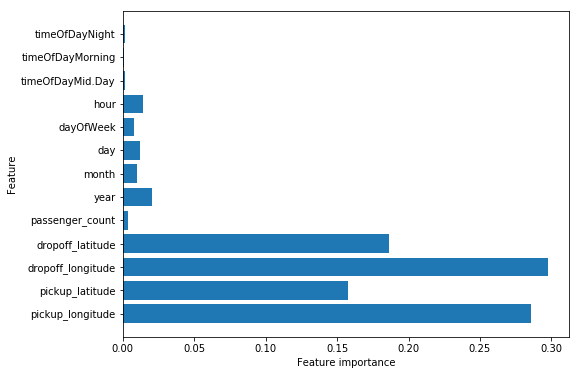

In [31]:
diabetes_features = X.columns

def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')

It looks like pickup and dropoff locations are highly significant features for predicting fair.   

### Random Forest

In [32]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)

In [33]:
y_pred_train = regressor.predict(X_train)
print('Test dataset Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))  

Test dataset Root Mean Squared Error: 1.097334444244013


In [34]:
print('Test dataset Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Test dataset Root Mean Squared Error: 2.5779799782021935


In [35]:
print("Feature importances:\n{}".format(regressor.feature_importances_))

Feature importances:
[0.28307908 0.16116172 0.29238551 0.19127401 0.00393659 0.0204331
 0.00984132 0.01208698 0.00797377 0.01387249 0.00147114 0.00091448
 0.0015698 ]


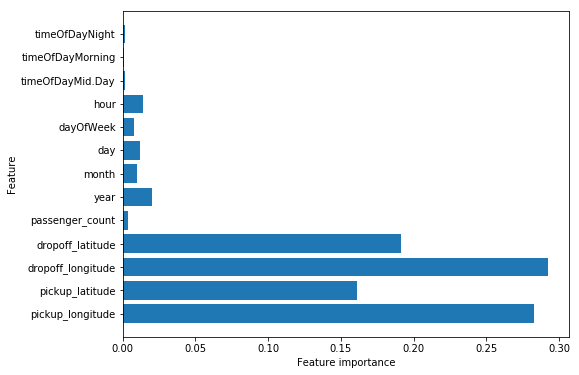

In [36]:
diabetes_features = X.columns

def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(regressor)
plt.savefig('feature_importance')

from feature importance plot we can see that fairs are mostly affected by the pickup and dropoff locations, so they are highly significant features and very less by the "time of day", we got very low importance values and also considerably by "year" ,"day", "dayofweek","month" features.

Tried using Support vector regression on this is data, but the disadvantage for using SVR is that it is only used for data sets containing less than 1000 observations, above that it takes a lot of time or say infinite time which is not efficient way of modelling.  

Random forest and decision tree also took long to give output when putted on K-fold Cross validation.

### Conclusion :

***Finally our Model is able to predict on test data with ~2% Root Mean Squared error on test data, which is quite good.*** 